In [259]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from scipy.ndimage import gaussian_filter


In [260]:
def create_grid(Nx, Ny, Lx, Ly):
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    X, Y = np.meshgrid(x, y)
    return X, Y, dx, dy

In [261]:
with h5py.File("frames/data_00001.h5", "r") as f:
    phi00 = f["phi"][:]
    
with h5py.File("frames_128x128_semi_rk4_mus_01_zero_kapp_200/data_00450.h5", "r") as f:
    phi0 = f["phi"][:]
    sigma_xx0 = f["sigma_xx"][:]
    sigma_xy0 = f["sigma_xy"][:]
    sigma_yy0 = f["sigma_yy"][:]
    X10 = f["X1"][:]
    X20 = f["X2"][:]
    J0 = f["J"][:]
    a0 = f["a"][:]
    b0 = f["b"][:]
    p0 = f["p"][:]
    div_vel0 = f["div_vel"][:]
    

with h5py.File("frames/data_00450.h5", "r") as f:
    phi = f["phi"][:]
    sigma_xx = f["sigma_xx"][:]
    sigma_xy = f["sigma_xy"][:]
    sigma_yy = f["sigma_yy"][:]
    X1 = f["X1"][:]
    X2 = f["X2"][:]
    J = f["J"][:]
    a = f["a"][:]
    b = f["b"][:]
    p = f["p"][:]
    div_vel = f["div_vel"][:]


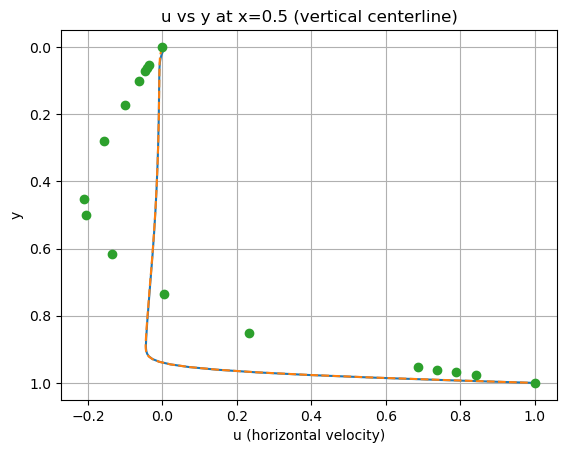

In [262]:
# plot the benchmark at cavity center line
Ny0 = Nx0 = 128
Ny = Nx = 128
y0 = np.linspace(0, 1, Ny0)
y = np.linspace(0, 1, Ny)

# a = gaussian_filter(a, sigma=1)
# a0 = gaussian_filter(a0, sigma=1)
u_center_x = a[:, Nx // 2]  # u_x at center vertical line
u_center_x0 = a0[:, Nx0 // 2]  # u_x at center vertical line

# load plot_u_y_Ghia100.csv first column y and second column u
u_ghia = np.loadtxt("plot_u_y_Ghia100.csv", delimiter=",", skiprows=1)
y_ghia = u_ghia[:, 0]
u_ghia = u_ghia[:, 1]
# plot the benchmark at cavity center line



plt.figure()
plt.plot(u_center_x, y)
plt.plot(u_center_x0, y0, "--")
plt.plot(u_ghia, y_ghia, "o", label="Ghia et al. (1982)")
plt.xlabel("u (horizontal velocity)")
plt.ylabel("y")
plt.title("u vs y at x=0.5 (vertical centerline)")
plt.grid(True)
plt.gca().invert_yaxis()  # optional to match standard benchmark view
plt.show()

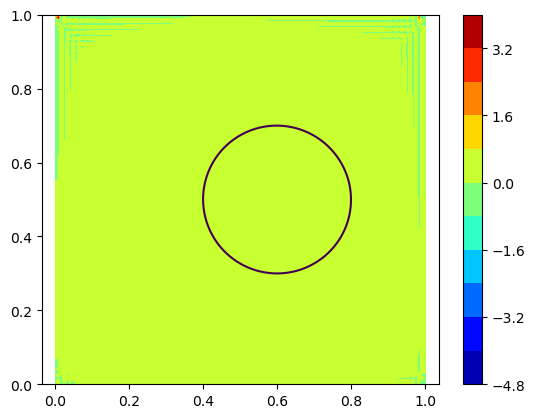

In [279]:
Lx, Ly = 1.0, 1.0
X, Y, dx, dy = create_grid(Nx, Ny, Lx, Ly)

Lx, Ly = 1.0, 1.0
X0, Y0, dx0, dy0 = create_grid(Nx0, Ny0, Lx, Ly)
plt.contourf(X, Y, div_vel, levels=10, cmap="jet")
plt.colorbar()
plt.contour(X,Y, phi, levels=[0])
plt.axis('equal')
plt.show()

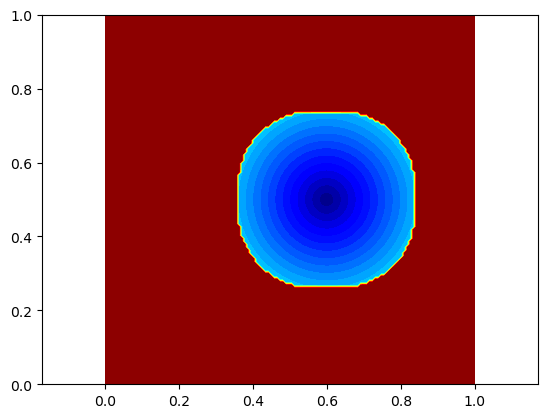

In [264]:
plt.contourf(X, Y, phi, levels=50, cmap="jet")
plt.axis('equal')
plt.show()

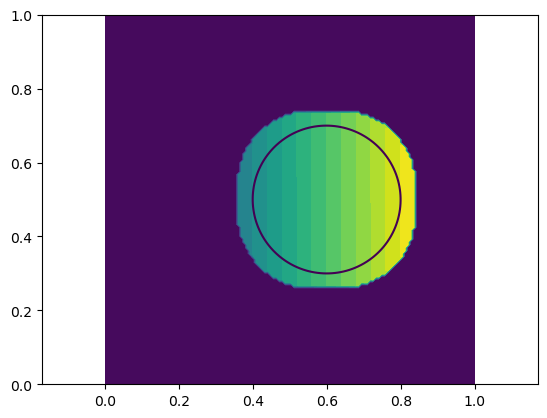

In [265]:
plt.contourf(X, Y, X1, levels=20)
plt.contour(X, Y, phi, levels=[0])
plt.axis('equal')
plt.show()

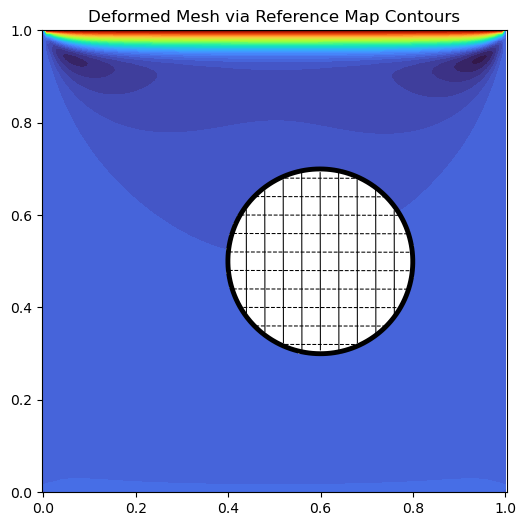

In [266]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Mask the region where phi <= 0 (solid) to make it white
a_masked = np.ma.masked_where(phi <= 0, a)

plt.figure(figsize=(6, 6))
plt.contourf(X, Y, a_masked, levels=70, cmap="turbo")

# Overlay a white patch over the solid region (optional for clean white fill)
plt.contourf(X, Y, phi <= 0, levels=[0.5, 1], colors='white', zorder=2)

# X1 = gaussian_filter(X1, sigma=1)
# X2 = gaussian_filter(X2, sigma=1)

# Add reference map contours
X1_masked = np.where(phi <= 0, X1, np.nan)
X2_masked = np.where(phi <= 0, X2, np.nan)
plt.contour(X, Y, phi, levels=[0], colors='black', linewidths=3.5, zorder=3)
plt.contour(X, Y, X1_masked, levels=10, colors='black', linewidths=0.75, linestyles='solid', zorder=4)
plt.contour(X, Y, X2_masked, levels=10, colors='black', linewidths=0.75, linestyles='dashed', zorder=4)

plt.title("Deformed Mesh via Reference Map Contours")
plt.axis('equal')
plt.show()



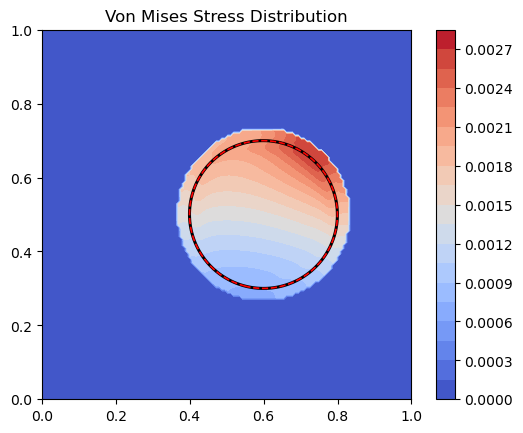

In [277]:
# smooth out the data
solid_mask = phi <= 0
sigma_vmises = np.sqrt(sigma_xx**2 - sigma_xx*sigma_yy + sigma_yy**2 + 3*sigma_xy**2)
sigma_vmises = gaussian_filter(sigma_vmises, sigma=0.1)

sigma_vmises0 = np.sqrt(sigma_xx0**2 - sigma_xx0*sigma_yy0 + sigma_yy0**2 + 3*sigma_xy0**2)
sigma_vmises0 = gaussian_filter(sigma_vmises0, sigma=0.1)
plt.contourf(X,Y, sigma_vmises, levels=20, cmap="coolwarm")

plt.colorbar()

plt.contour(X0, Y0, phi0, levels=[0], colors='black', linewidths=2.2, linestyles='-')
plt.contour(X,  Y, phi, levels=[0], colors='red', linewidths=1.2, linestyles='--')
plt.gca().set_aspect('equal')

plt.title("Von Mises Stress Distribution")
plt.show()


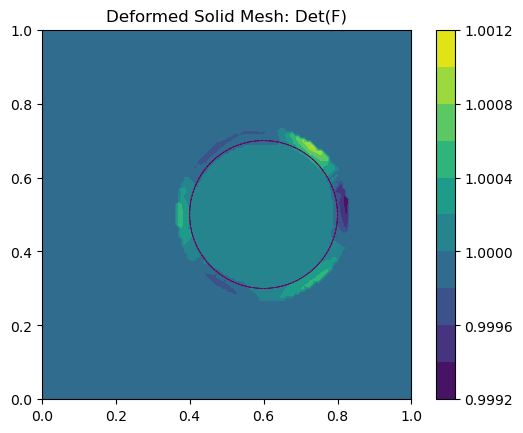

In [275]:
# J = gaussian_filter(J, sigma=1)
plt.contour(X0, Y0, phi00, levels=[0], colors='black', linewidths=0.5)
plt.contour(X0, Y0, phi0, levels=[0], colors='b', linewidths=0.5, linestyles='-')
plt.contour(X, Y, phi, levels=[0], colors='r', linewidths=0.5, linestyles='--')
solid_mask = phi <= 0
plt.contourf(X,Y, J, levels=10)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.title("Deformed Solid Mesh: Det(F)")
plt.show()


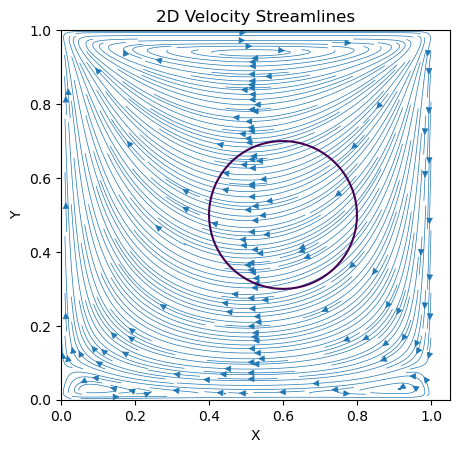

In [269]:
# Create Meshgrid for 3D surface plot
Lx, Ly = 1.0, 1.0
X, Y, dx, dy = create_grid(Nx, Ny, Lx, Ly)

# plot 2D velocity streamlines
fig, ax = plt.subplots()
ax.streamplot(X, Y, a, b, linewidth=0.5, density=3.5)
ax.set_title('2D Velocity Streamlines')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.gca().set_aspect('equal')

ax.contour(X, Y, phi, levels=[0])
plt.show()

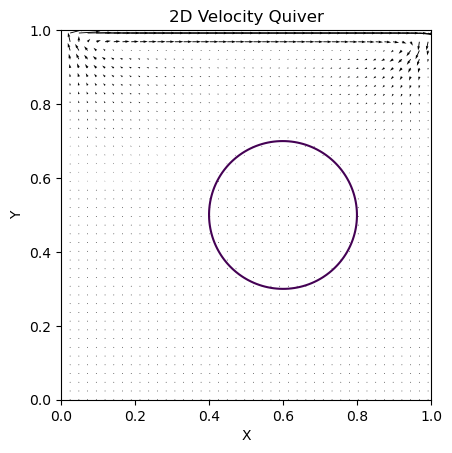

In [270]:
# plot 2D velocity quiver
fig, ax = plt.subplots()
ax.quiver(X[::3, ::3], Y[::3, ::3], a[::3, ::3], b[::3, ::3], angles='xy', scale_units='xy', scale=10.5, color='k')
ax.set_title('2D Velocity Quiver')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.gca().set_aspect('equal')
plt.contour(X, Y, phi, levels=[0])
plt.show()
